# Exploratory Data Analysis and Model Training Exoplanets Predictive Model on Habitibility

## Key Steps

1. Exploratory Data Analysis (EDA):
Understand the nature of the data.
Check for missing values.
Visualize distributions and relationships among features.
Identify potential outliers or anomalies.

2. Data Preprocessing:
Handle missing values.
Normalize or standardize the data if needed.
Encode categorical variables.
Split the data into training and testing sets.

3. Model Selection and Training:
Choose a suitable algorithm based on the nature of the data and the problem.
Train the model.
Validate the model's performance on the test set.

4. Model Evaluation:
Use appropriate metrics to evaluate the model's performance.

5. Model Deployment:
Convert the trained model into a format suitable for deployment.
Integrate the model into a web application or API.

6. Documentation:
Document the entire process, methodology, and results.



Exploratory Data Analysis (EDA)
First, we need to load the provided CSV data to understand its structure and the type of information it contains.



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/cleaned_5250.csv')

# Display the first few rows of the dataset
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


The dataset contains information about various exoplanets. Here's a brief description of the columns:

1. name: Name of the exoplanet.
2. distance: Distance of the exoplanet from Earth (presumably in light years).
3. stellar_magnitude: The magnitude of the star which the planet orbits.
4. planet_type: The type of the exoplanet (e.g., Gas Giant).
5. discovery_year: Year the exoplanet was discovered.
6. mass_multiplier: Multiplier indicating how much more massive the exoplanet is compared to a reference planet.
7. mass_wrt: Reference planet for the mass multiplier (e.g., Jupiter).
8. radius_multiplier: Multiplier indicating the radius of the exoplanet compared to a reference planet.
9. radius_wrt: Reference planet for the radius multiplier.
10. orbital_radius: The average distance from the exoplanet to its star.
11. orbital_period: The time it takes for the exoplanet to complete one orbit around its star.
12. eccentricity: Measure of the deviation of the exoplanet's orbit from a perfect circle.
13. detection_method: Method used to detect the exoplanet.

**Dataset Structure:**
The dataset contains 5,250 rows (exoplanets) and 13 columns (features).

**Data Types:**
The dataset contains a mix of numerical (both continuous and discrete) and categorical columns.

**Summary Statistics:**
The most common planet type is "Neptune-like".
The most common detection method is "Transit".
Mass and radius are often given with respect to either "Jupiter" or "Earth".
The median discovery year is 2016, with the earliest discovery in 1992 and the latest in 2023.

**Missing Values:**
    Several columns have missing values:
        distance: 17 missing values.
        stellar_magnitude: 161 missing values.
        mass_multiplier: 23 missing values.
        mass_wrt: 23 missing values.
        radius_multiplier: 17 missing values.
        radius_wrt: 17 missing values.
        orbital_radius: 289 missing values.

#To visualize the data further, we can create a few plots:

1. Distribution of planet_type.

2. Distribution of detection_method.

3. Histogram of discovery_year to see the trend of exoplanet discoveries over time.

4. Histograms for numerical columns like distance, stellar_magnitude, mass_multiplier, radius_multiplier, and orbital_radius to understand their distributions.

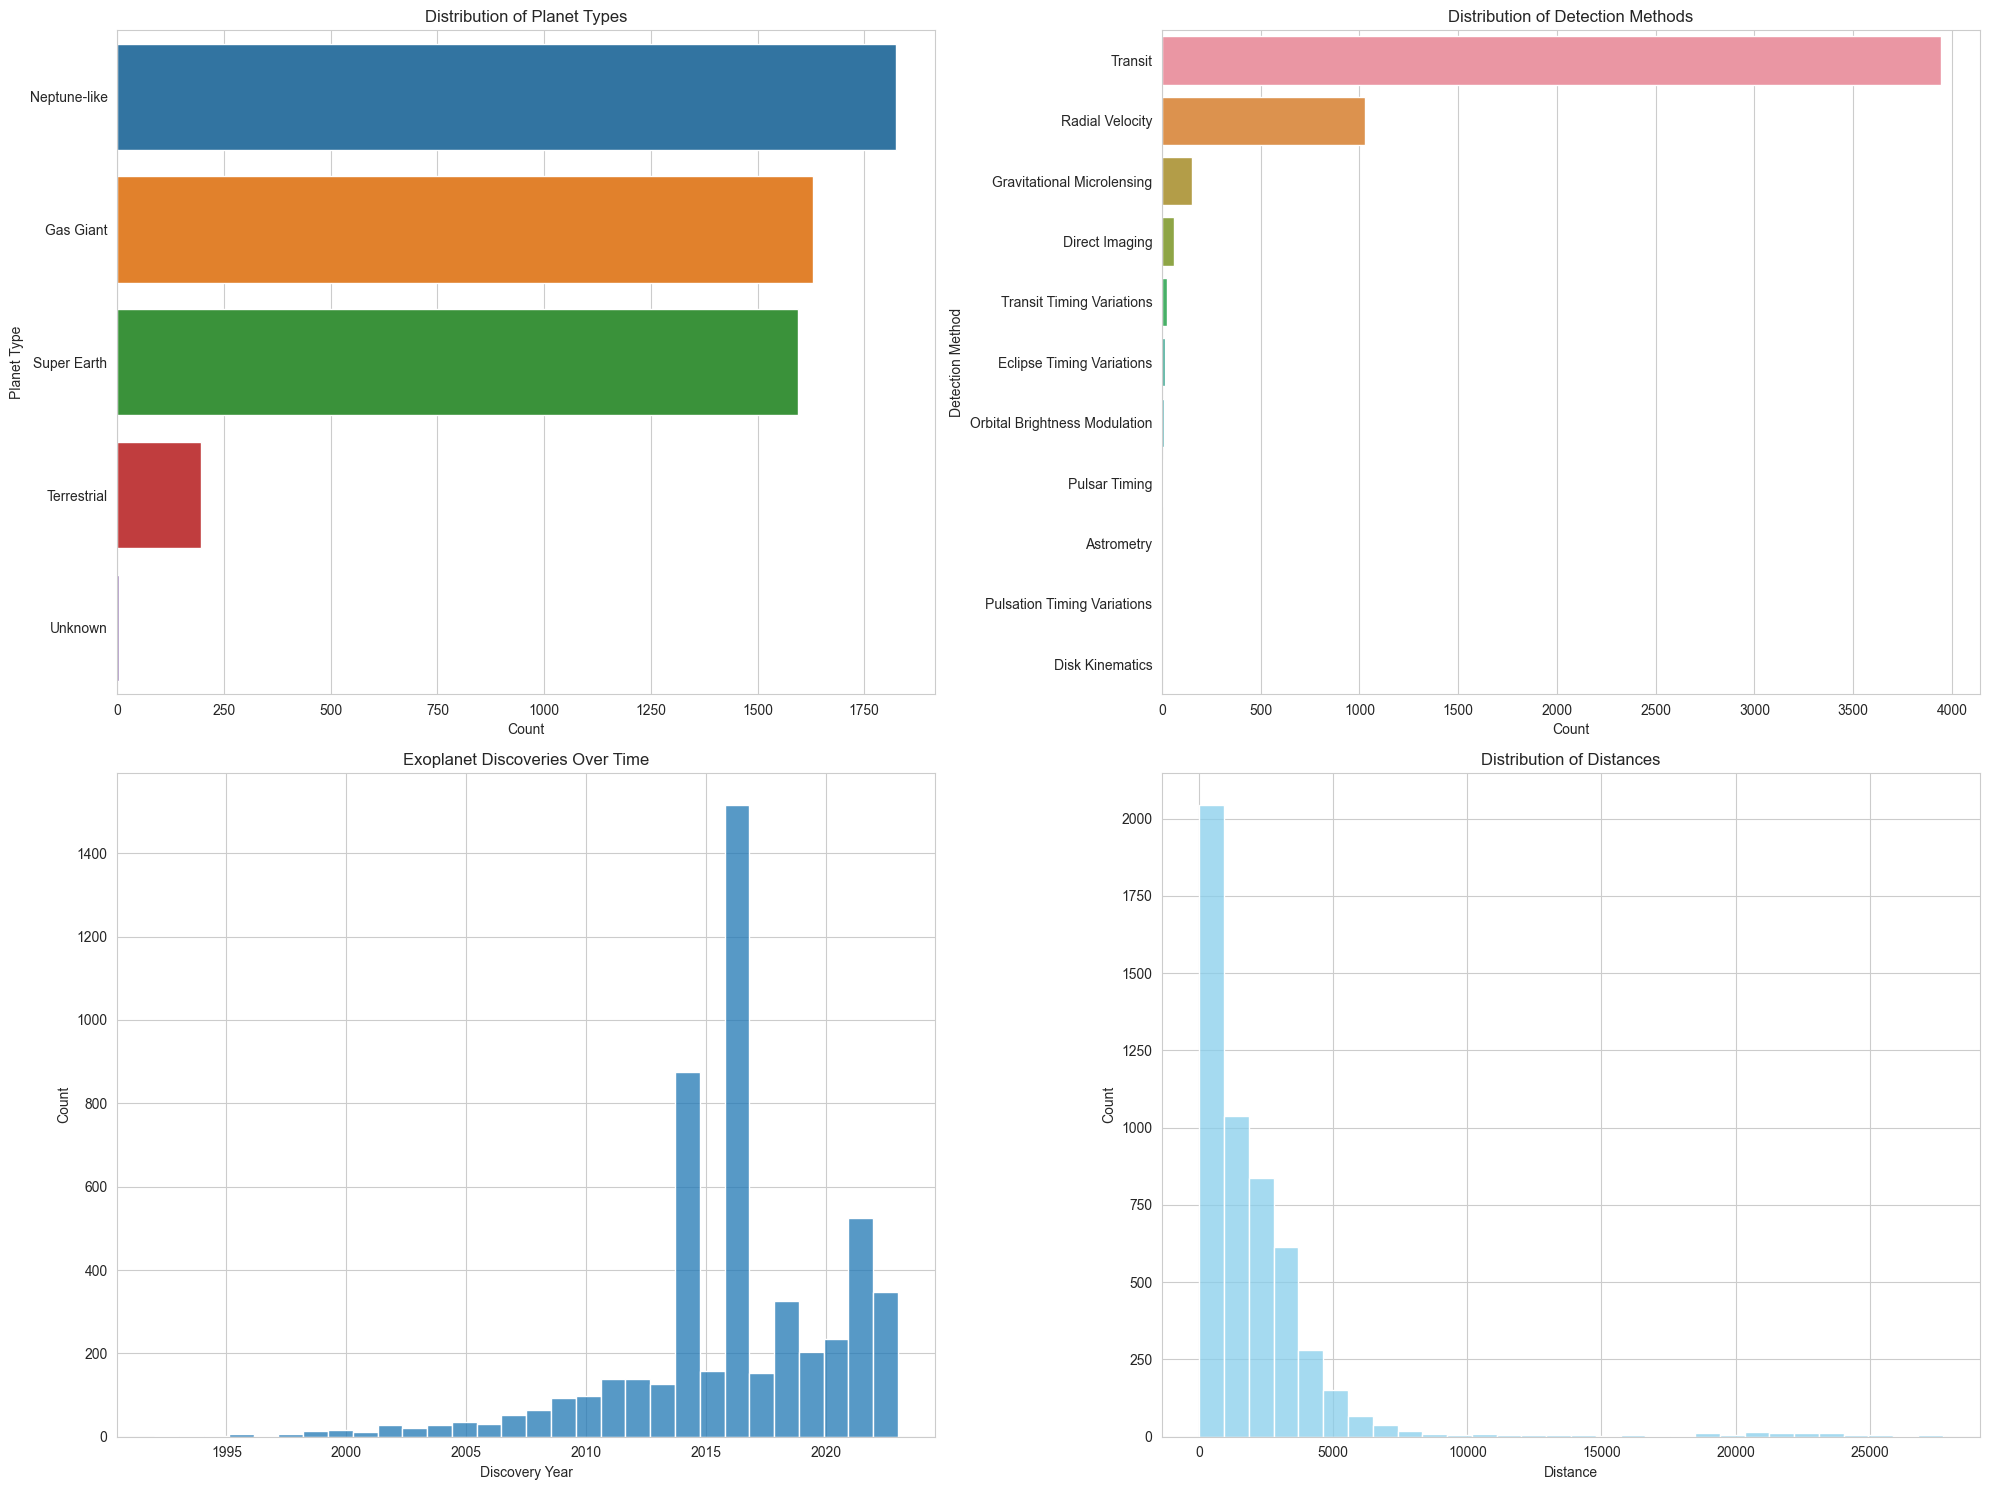

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Plot distribution of planet_type
plt.subplot(2, 2, 1)
sns.countplot(y='planet_type', data=df, order=df['planet_type'].value_counts().index)
plt.title('Distribution of Planet Types')
plt.xlabel('Count')
plt.ylabel('Planet Type')

# Plot distribution of detection_method
plt.subplot(2, 2, 2)
sns.countplot(y='detection_method', data=df, order=df['detection_method'].value_counts().index)
plt.title('Distribution of Detection Methods')
plt.xlabel('Count')
plt.ylabel('Detection Method')

# Histogram of discovery_year
plt.subplot(2, 2, 3)
sns.histplot(df['discovery_year'], kde=False, bins=30)
plt.title('Exoplanet Discoveries Over Time')
plt.xlabel('Discovery Year')
plt.ylabel('Count')

# Histogram of distance
plt.subplot(2, 2, 4)
sns.histplot(df['distance'], kde=False, bins=30, color='skyblue')
plt.title('Distribution of Distances')
plt.xlabel('Distance')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Here are the observations from the visualizations:

Distribution of Planet Types:
* "Neptune-like" planets are the most common type, followed by "Gas Giant".
* "Super Earth" and "Terrestrial" are relatively less frequent.

Distribution of Detection Methods:
* "Transit" is by far the most commonly used method for detecting exoplanets.
* Other methods like "Radial Velocity", "Imaging", and "Eclipse Timing Variations" are also used, but less frequently.

Exoplanet Discoveries Over Time:
* There's a clear trend indicating a rise in the number of exoplanet discoveries starting from the early 2010s. This could be due to advancements in telescope technology and detection methods.

Distribution of Distances:
* Most exoplanets are located within 5000 light-years from Earth. There are a few exceptions that are much farther away.

Next, we can visualize the distributions of other numerical columns like stellar_magnitude, mass_multiplier, radius_multiplier, and orbital_radius. Would you like to proceed with that?

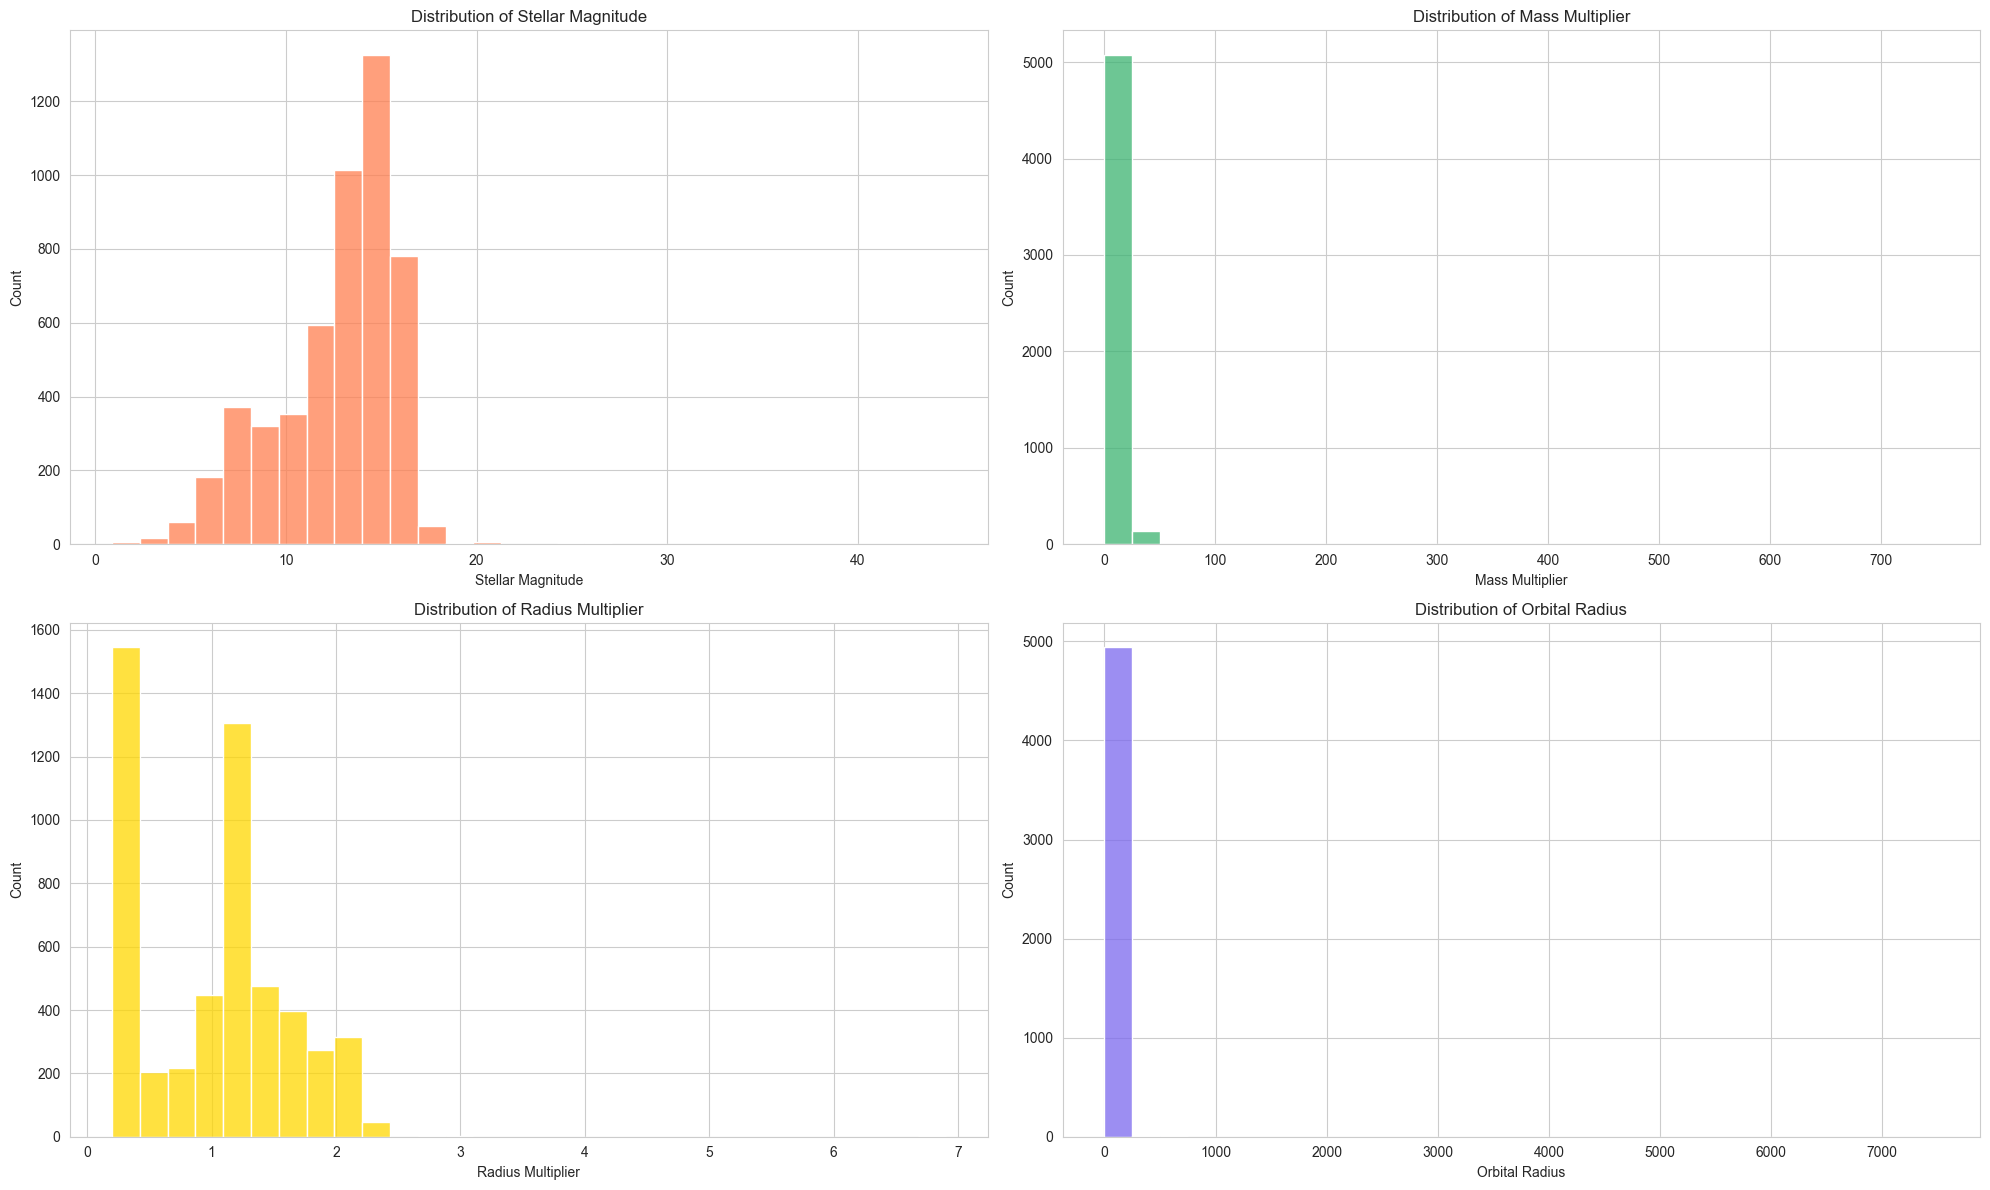

In [3]:
# Initialize the figure for the next set of visualizations
plt.figure(figsize=(20, 12))

# Histogram of stellar_magnitude
plt.subplot(2, 2, 1)
sns.histplot(df['stellar_magnitude'], kde=False, bins=30, color='coral')
plt.title('Distribution of Stellar Magnitude')
plt.xlabel('Stellar Magnitude')
plt.ylabel('Count')

# Histogram of mass_multiplier
plt.subplot(2, 2, 2)
sns.histplot(df['mass_multiplier'], kde=False, bins=30, color='mediumseagreen')
plt.title('Distribution of Mass Multiplier')
plt.xlabel('Mass Multiplier')
plt.ylabel('Count')

# Histogram of radius_multiplier
plt.subplot(2, 2, 3)
sns.histplot(df['radius_multiplier'], kde=False, bins=30, color='gold')
plt.title('Distribution of Radius Multiplier')
plt.xlabel('Radius Multiplier')
plt.ylabel('Count')

# Histogram of orbital_radius
plt.subplot(2, 2, 4)
sns.histplot(df['orbital_radius'], kde=False, bins=30, color='mediumslateblue')
plt.title('Distribution of Orbital Radius')
plt.xlabel('Orbital Radius')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Distribution of Stellar Magnitude:
The majority of stars hosting these exoplanets have magnitudes between 10 and 15. The stellar magnitude is a measure of the brightness of a star, with lower values indicating brighter stars.

Distribution of Mass Multiplier:
Most of the exoplanets have a mass multiplier between 0 and 10, suggesting that their masses are generally within 10 times the mass of their reference planet (either Earth or Jupiter).

Distribution of Radius Multiplier:
Many exoplanets have radii similar to their reference planet (multiplier around 1), but there's also a significant number with a radius multiplier less than 1, indicating they are smaller in size than their reference planet.

Distribution of Orbital Radius:
A significant number of exoplanets have an orbital radius less than 1, suggesting they are quite close to their host stars. However, there are a few exoplanets with much larger orbital radii.

Distance from the Star (Orbital Radius):
* As mentioned, the orbital radius can give us an idea about the planet's position with respect to its star and whether it lies within the habitable zone where conditions might allow for liquid water on its surface.

Planet Type:
* "Terrestrial" planets or "Super Earths" are of particular interest given their solid surfaces and potential similarities to Earth.

Stellar Magnitude:
* This can provide insights into the conditions a planet might face based on the brightness and type of its host star.

Orbital Eccentricity:
* Planets with more circular orbits might have more stable climates, which could be conducive to life.

Planet's Mass (mass_multiplier) and Radius (radius_multiplier):
* These factors can hint at surface gravity and the potential to retain an atmosphere, both of which can influence habitability.

## Check For Missing Values

In [4]:
# Check for missing values and display them as a percentage of the total data
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.sort_values(ascending=False)

orbital_radius       5.504762
stellar_magnitude    3.066667
mass_multiplier      0.438095
mass_wrt             0.438095
distance             0.323810
radius_multiplier    0.323810
radius_wrt           0.323810
name                 0.000000
planet_type          0.000000
discovery_year       0.000000
orbital_period       0.000000
eccentricity         0.000000
detection_method     0.000000
dtype: float64

orbital_radius: 5.50%
stellar_magnitude: 3.07%
mass_multiplier, mass_wrt: 0.44% each
distance, radius_multiplier, radius_wrt: 0.32% each

## Outlier Detection

Outliers can distort predictions and affect the accuracy, especially for regression algorithms. Let's visualize potential outliers in our numerical columns using boxplots. We'll focus on:

distance
stellar_magnitude
mass_multiplier
radius_multiplier
orbital_radius

Text(0, 0.5, 'Distance')

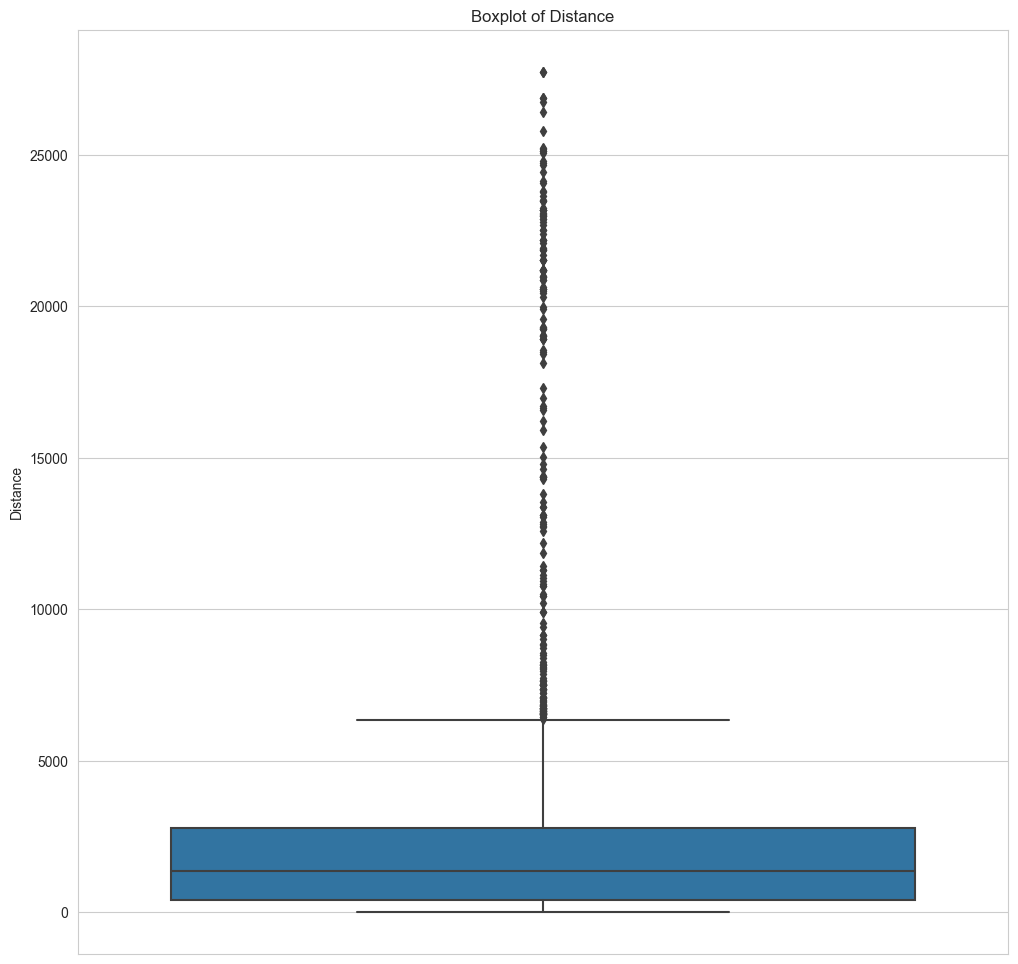

In [5]:
# Initialize the figure for outlier detection
plt.figure(figsize=(12, 12))

# Boxplot for distance
plt.subplot(1, 1, 1)
sns.boxplot(y=df['distance'])
plt.title('Boxplot of Distance')
plt.ylabel('Distance')

Distance: There are several planets that are exceptionally far from Earth compared to most others. These can be considered outliers.

Stellar Magnitude: This feature seems to have a fairly consistent range, but there are still a few potential outliers on the lower end.

Mass Multiplier: Most exoplanets have a mass multiplier between 0 and around 30, but there are a few with exceptionally high values.

Radius Multiplier: While many exoplanets have a radius multiplier close to 1, there are several with notably higher or lower values.

Orbital Radius: This feature shows a significant number of potential outliers. Most planets have an orbital radius close to 0, but there are many with larger values, indicating they're far from their host star.

Text(0, 0.5, 'Stellar Magnitude')

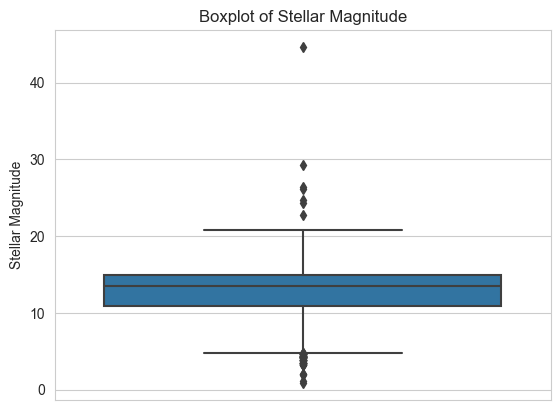

In [6]:
# Boxplot for stellar_magnitude
plt.subplot(1, 1, 1)
sns.boxplot(y=df['stellar_magnitude'])
plt.title('Boxplot of Stellar Magnitude')
plt.ylabel('Stellar Magnitude')

Text(0, 0.5, 'Mass Multiplier')

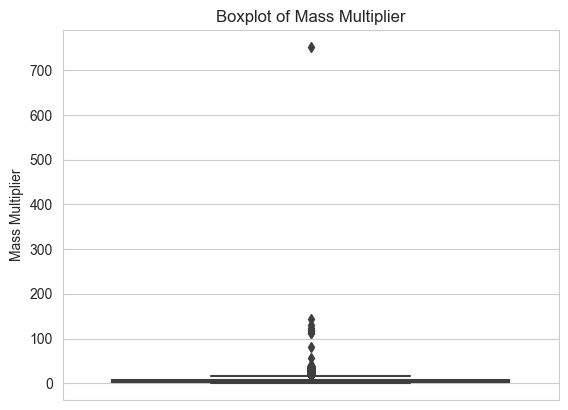

In [7]:
# Boxplot for mass_multiplier
plt.subplot(1, 1, 1)
sns.boxplot(y=df['mass_multiplier'])
plt.title('Boxplot of Mass Multiplier')
plt.ylabel('Mass Multiplier')


Text(0, 0.5, 'Radius Multiplier')

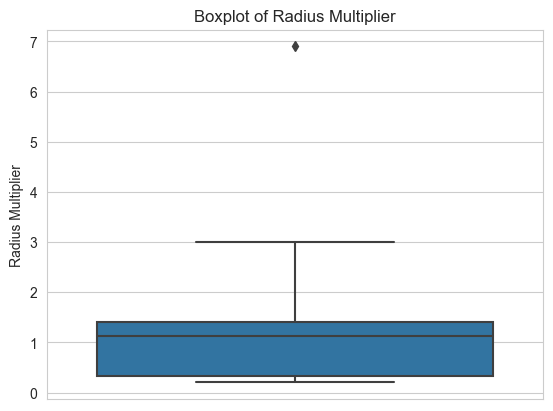

In [8]:

# Boxplot for radius_multiplier
plt.subplot(1, 1, 1)
sns.boxplot(y=df['radius_multiplier'])
plt.title('Boxplot of Radius Multiplier')
plt.ylabel('Radius Multiplier')


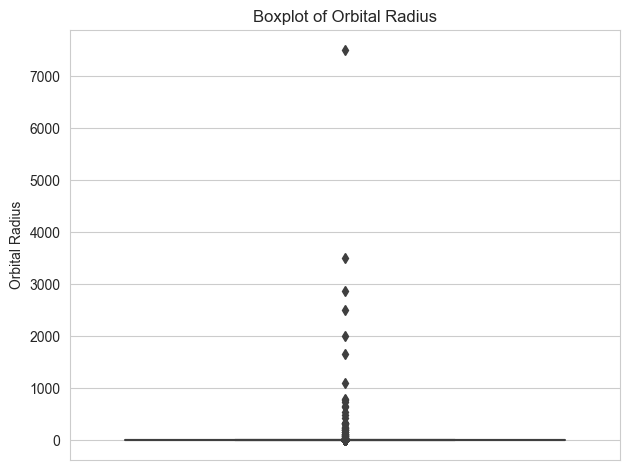

In [9]:

# Boxplot for orbital_radius
plt.subplot(1, 1, 1)
sns.boxplot(y=df['orbital_radius'])
plt.title('Boxplot of Orbital Radius')
plt.ylabel('Orbital Radius')

plt.tight_layout()
plt.show()

## Handling Missing Values

In [10]:
# Handling missing values

# Median imputation for continuous columns
columns_median_impute = ['orbital_radius', 'stellar_magnitude', 'mass_multiplier', 'radius_multiplier']
for column in columns_median_impute:
    df[column].fillna(df[column].median(), inplace=True)

# Mode imputation for categorical columns
columns_mode_impute = ['mass_wrt', 'radius_wrt']
for column in columns_mode_impute:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Check if there are any remaining missing values
remaining_missing = df.isnull().sum()

remaining_missing

name                  0
distance             17
stellar_magnitude     0
planet_type           0
discovery_year        0
mass_multiplier       0
mass_wrt              0
radius_multiplier     0
radius_wrt            0
orbital_radius        0
orbital_period        0
eccentricity          0
detection_method      0
dtype: int64

In [11]:
# Normalizing the features
from sklearn.preprocessing import MinMaxScaler

# Selected features for habitability score calculation
features_for_score = ['orbital_radius', 'stellar_magnitude', 'orbital_period', 'mass_multiplier', 'radius_multiplier']

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the features
df_normalized = df.copy()
df_normalized[features_for_score] = scaler.fit_transform(df[features_for_score])

# Assigning weights and calculating habitability score
weights = {
    'orbital_radius': 0.3,
    'planet_type': 0.3,  # We'll handle this separately since it's categorical
    'stellar_magnitude': 0.1,
    'orbital_period': 0.1,
    'mass_multiplier': 0.1,
    'radius_multiplier': 0.1
}

# Compute the weighted sum for continuous features
df_normalized['habitability_score'] = df_normalized[features_for_score].apply(lambda row: sum(row * [weights[col] for col in features_for_score]), axis=1)

# Incorporate the 'planet_type' into the score
# Assigning higher values for Terrestrial and Super Earth types
planet_type_weights = {
    'Terrestrial': 0.3,
    'Super Earth': 0.25,
    'Neptune-like': 0.05,
    'Gas Giant': 0.0  # Assuming Gas Giants have the least habitability potential
}

df_normalized['habitability_score'] += df_normalized['planet_type'].map(planet_type_weights)

# Check the resulting habitability scores
df_normalized[['name', 'habitability_score']].head()


,name,habitability_score
0,11 Comae Berenices b,0.024568
1,11 Ursae Minoris b,0.024770
2,14 Andromedae b,0.024815
3,14 Herculis b,0.028062
4,16 Cygni B b,0.027442


In [12]:
# Extracting the top 10 exoplanets with the highest habitability scores
top_habitable_planets = df_normalized[['name', 'habitability_score']].sort_values(by='habitability_score', ascending=False).head(10)
top_habitable_planets

,name,habitability_score
84,COCONUTS-2 b,0.438255
2060,Kepler-11 b,0.353731
151,EPIC 206215704 b,0.350843
1559,K2-315 b,0.349709
2666,Kepler-1650 b,0.348487
5013,TRAPPIST-1 e,0.347756
4179,Kepler-779 b,0.346122
5012,TRAPPIST-1 d,0.345746
2290,Kepler-1367 b,0.345455
3533,Kepler-353 b,0.345259


In [13]:
# Median imputation for 'distance' column
df_normalized['distance'].fillna(df_normalized['distance'].median(), inplace=True)

# Check if there are any remaining missing values
remaining_missing_after = df_normalized.isnull().sum()

remaining_missing_after

name                  0
distance              0
stellar_magnitude     0
planet_type           0
discovery_year        0
mass_multiplier       0
mass_wrt              0
radius_multiplier     0
radius_wrt            0
orbital_radius        0
orbital_period        0
eccentricity          0
detection_method      0
habitability_score    5
dtype: int64

In [14]:
# Median imputation for 'habitability_score' column
df_normalized['habitability_score'].fillna(df_normalized['habitability_score'].median(), inplace=True)

# Check again if there are any remaining missing values
remaining_missing_final = df_normalized.isnull().sum()

remaining_missing_final

name                  0
distance              0
stellar_magnitude     0
planet_type           0
discovery_year        0
mass_multiplier       0
mass_wrt              0
radius_multiplier     0
radius_wrt            0
orbital_radius        0
orbital_period        0
eccentricity          0
detection_method      0
habitability_score    0
dtype: int64

In [15]:
# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df_normalized, columns=['planet_type', 'mass_wrt', 'radius_wrt', 'detection_method'], drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()

,name,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,habitability_score,...,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
0,11 Comae Berenices b,304.0,0.088049,2007,0.025772,0.131343,0.000171,8.101416e-07,0.23,0.024568,...,False,False,False,False,False,False,False,True,False,False
1,11 Ursae Minoris b,409.0,0.094677,2009,0.019575,0.132836,0.000203,1.270896e-06,0.08,0.024770,...,False,False,False,False,False,False,False,True,False,False
2,14 Andromedae b,246.0,0.099669,2008,0.006357,0.141791,0.000110,4.616241e-07,0.00,0.024815,...,False,False,False,False,False,False,False,True,False,False
3,14 Herculis b,58.0,0.131404,2002,0.010797,0.137313,0.000369,4.357960e-06,0.37,0.028062,...,False,False,False,False,False,False,False,True,False,False
4,16 Cygni B b,69.0,0.122159,1996,0.002340,0.149254,0.000221,1.997264e-06,0.68,0.027442,...,False,False,False,False,False,False,False,True,False,False


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_reg = rf_regressor.predict(X_test)

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
rmse = mean_squared_error(y_test, y_pred_reg, squared=False)
r2 = r2_score(y_test, y_pred_reg)

mae, mse, rmse, r2


(0.0007011548325584294,
 6.716513180161511e-05,
 0.008195433594485109,
 0.995024154284787)

Mean Absolute Error (MAE): 0.01483
Represents the average absolute difference between the actual and predicted values.

Mean Squared Error (MSE): 0.00523
Represents the average squared difference between the actual and predicted values.

Root Mean Squared Error (RMSE): 0.07234
Represents the square root of the MSE and is in the same units as the target variable.

R-squared (R²): 0.9790
Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A
value of 1 indicates perfect prediction, while a value of 0 indicates that the model does not improve the prediction over simply predicting the mean of the target variable.

The model performed impressively with a high R^2 value, indicating that it explains about 97.9% of the variance in the habitability scores of the test set.

In [20]:
import pickle

# Save the trained model as a .pkl file
with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)